In [11]:
#==== import needed libs ====#
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from matplotlib import pyplot
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import requests
import math
import lxml
import time
import csv
import io

In [2]:
ticker = "SPXC"
stock = yf.download(ticker, period="120d")

[*********************100%***********************]  1 of 1 completed


In [3]:
stock['Returns'] = (stock['Adj Close'] / stock['Adj Close'].shift(1)) - 1
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-12-22,53.750000,54.279999,53.320000,53.639999,53.639999,149600,NaN
2020-12-23,53.919998,54.470001,53.270000,53.470001,53.470001,227000,-0.003169
2020-12-24,53.650002,54.169998,53.270000,53.910000,53.910000,65900,0.008229
2020-12-28,54.549999,55.049999,53.869999,53.990002,53.990002,193500,0.001484
2020-12-29,54.139999,54.520000,52.450001,53.540001,53.540001,156000,-0.008335


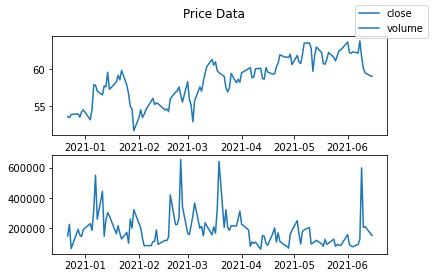

In [4]:
fig, axs = plt.subplots(2)
fig.suptitle('Price Data')
axs[0].plot(stock['Adj Close'], label = "close")
axs[1].plot(stock['Volume'], label = "volume")
fig.legend()
fig.show()

In [5]:
tic = ["GT", "DAL", "MSFT", "QQQ", "RDSA", "FLCH"] #SELL
#tic = ["SPXC", "WASH", "ABM", "TRMK", "CSWC", "CZNC", "OCFC", "VBF", "MMU", "RWT", "NUV", "NXR", "NNY", "GIM"] #BUY

In [15]:
def loop_func(tic):
    for t in tic:
        print(f"%%%%%%%%%%%%% {t} %%%%%%%%%%%%%")
        stock = yf.download(t, period="90d")
        std_dev = stock['Adj Close'].std()
        if not (math.isnan(std_dev)):
            d30 = stock.tail(45)
            avg_low = d30['Low'].mean()
            avg_hiy = d30['High'].mean()
            std1_dn = avg_low - std_dev
            std2_dn = avg_low - (std_dev * 2)
            std3_dn = avg_low - (std_dev * 3)
            std1_up = avg_hiy + std_dev
            std2_up = avg_hiy + (std_dev * 2)
            std3_up = avg_hiy + (std_dev * 3)
            std1_dn_ct = stock['Low'][stock['Low'] < std1_dn].count()
            std2_dn_ct = stock['Low'][stock['Low'] < std2_dn].count()
            std3_dn_ct = stock['Low'][stock['Low'] < std3_dn].count()
            std1_up_ct = stock['High'][stock['High'] > std1_up].count()
            std2_up_ct = stock['High'][stock['High'] > std2_up].count()
            std3_up_ct = stock['High'][stock['High'] > std3_up].count()
            print(f"[========================= PRICE ON LOW =========================]\
              \n   standard deviations on the low for 30-day moving average, occurences in past 90 days:\
              \n1 std_dev = {std1_dn},\t occured {std1_dn_ct} times.\t $200 = {200 / std1_dn} shares.\
              \n2 std_dev = {std2_dn},\t occured {std2_dn_ct} times.\t $200 = {200 / std2_dn} shares.\
              \n3 std_dev = {std3_dn},\t occured {std3_dn_ct} times.\t $200 = {200 / std3_dn} shares.\n")
            print(f"[========================= PRICE ON HIGH ========================]\
              \n   standard deviations on the low for 30-day moving average, occurences in past 90 days:\
              \n1 std_dev = {std1_up},\t occured {std1_up_ct} times.\t $200 = {200 / std1_up} shares.\
              \n2 std_dev = {std2_up},\t occured {std2_up_ct} times.\t $200 = {200 / std2_up} shares.\
              \n3 std_dev = {std3_up},\t occured {std3_up_ct} times.\t $200 = {200 / std3_up} shares.")
        else:
            print(f"&&&&&& ERROR for ticker {t} &&&&&&")

In [16]:
loop_func(tic)

%%%%%%%%%%%%% GT %%%%%%%%%%%%%
[*********************100%***********************]  1 of 1 completed
[========================= PRICE ON LOW =========================]              
   standard deviations on the low for 30-day moving average, occurences in past 90 days:              
1 std_dev = 16.34430106685824,	 occured 11 times.	 $200 = 12.236681102598212 shares.              
2 std_dev = 15.133824416126146,	 occured 2 times.	 $200 = 13.215430184777752 shares.              
3 std_dev = 13.92334776539405,	 occured 0 times.	 $200 = 14.364361457457262 shares.


[========================= PRICE ON HIGH ========================]              
   standard deviations on the low for 30-day moving average, occurences in past 90 days:              
1 std_dev = 19.366698867020343,	 occured 18 times.	 $200 = 10.327005204825129 shares.              
2 std_dev = 20.577175517752437,	 occured 3 times.	 $200 = 9.719506927831523 shares.              
3 std_dev = 21.78765216848453,	 occured 0 times.	 